In [202]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('../data/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data/kaggle/input/.DS_Store
../data/kaggle/input/titanic/my_submission.csv
../data/kaggle/input/titanic/test.csv
../data/kaggle/input/titanic/train.csv


In [203]:
train_data = pd.read_csv('../data/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
train_data.describe()
# train_data.Embarked.unique()
# train_data.groupby('Embarked').hist()
# train_data.groupby('Cabin').sum().head(50)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [205]:
test_data = pd.read_csv('../data/kaggle/input/titanic/test.csv')
print(test_data.columns)
test_data.head()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [206]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [207]:
def squash_dummies(df: pd.DataFrame, feature, threshold):
    masked_df = df[feature].mask(df[feature] > threshold)
    df = df.drop(columns=[feature])
    df[feature] = masked_df
    return df

def prepare_df(df: pd.DataFrame):
    new_df = df
    extract_title_from_name(new_df)
    _dummy_features0 = ["Embarked"]
    _dummy_features = ["Pclass", "Sex", "SibSp", "Parch", "Title"]
    new_df = squash_dummies(new_df, 'Parch', 2)
    new_df = squash_dummies(new_df, 'SibSp', 4)
    new_df = new_df.drop(columns=['Name'])
    new_df = pd.get_dummies(new_df, columns=_dummy_features0, dummy_na=True)
    return pd.get_dummies(new_df, columns=_dummy_features, dummy_na=False)

def extract_title_from_name(df: pd.DataFrame):
    df['Title'] = list(zip(df.Sex, df.Name, df.SibSp))
    df['Title'] = df['Title'].transform(lambda n: extract_title(n))
    print(df['Title'].unique())

def extract_title(name):
    male = name[0] == 'male'
    if male and str(name[1]).find('Mr') > -1:
        return 'Mr'
    if not male and str(name[1]).find('Mrs') > -1:
        return 'Mrs'
    if not male and str(name[1]).find('Miss') > -1:
        return 'Miss'
    if not male and str(name[1]).find('Mme') > -1:
        return 'Ms'
    if male and str(name[1]).find('Master') > -1:
        return 'Master'
    if str(name[1]).find('Dr.') > -1:
        return 'Dr'
    if male:
        return 'Mr'
    if name[2]>1:
        return'Mrs'
    # print(name)
    return 'Ms'

In [208]:
def plot_rate(df: pd.DataFrame, feature):
    m_df = df
    m_df['cnt'] = 1
    m_gb = m_df.groupby(feature).sum()
    m_gb['rate'] = m_gb['Survived']/m_gb['cnt']
    # m_gb[['rate']].plot()
    # plt.scatter(m_gb)
    # plt.show()
    print(m_gb[['rate']].head())

In [209]:
all_data = pd.concat([train_data, test_data], axis=0)
extract_title_from_name(all_data)
print(f"Columns: {all_data.columns}")

eda_features = ["Pclass", "Title", "Sex", "SibSp", "Parch", "Embarked"]
for k in eda_features:
    plot_rate(all_data, k)
    # print(f"Unique {k}: {train_data[k].unique()}")
# plot_rate(all_data, eda_features[0])


['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')
            rate
Pclass          
1       0.421053
2       0.314079
3       0.167842
            rate
Title           
Dr      0.375000
Master  0.377049
Miss    0.488372
Mr      0.108387
Mrs     0.507463
          rate
Sex           
female  0.5000
male    0.1293
           rate
SibSp          
0      0.235690
1      0.351097
2      0.309524
3      0.200000
4      0.136364
           rate
Parch          
0      0.232535
1      0.382353
2      0.353982
3      0.375000
4      0.000000
              rate
Embarked          
C         0.344444
Q         0.243902
S         0.237418


In [180]:
from sklearn.metrics import mean_squared_error

def eval_msu(x_train, x_eval, y_train, y_eval, _model):
    _model.fit(x_train, train_y)
    eval_predictions = _model.predict(x_eval)
    msu = mean_squared_error(y_eval, eval_predictions)
    train_predictions = _model.predict(x_train)
    train_msu = mean_squared_error(y_train, train_predictions)
    # print(f"Eval msu = {msu}")
    return msu, train_msu

In [218]:
from sklearn.ensemble import RandomForestClassifier

def forest_accuracy_estimators(_x, _y, x_train, x_eval, y_train, y_eval, max_depth, max_est=600, est_step=5):
    min_msu = float('inf')
    min_train_msu = 0
    optimal_n=0
    estimators = range(50, max_est, est_step)
    msus = []
    cvs = []
    for i in estimators:
        _model = RandomForestClassifier(n_estimators=i, max_depth=max_depth, random_state=1)
        msu, train_msu = eval_msu(x_train, x_eval, y_train, y_eval, _model)
        cvs.append(cross_val_score(_model, _x, _y, cv=5).mean())
        msus.append(msu)
        if msu < min_msu:
            min_msu = msu
            optimal_n = i
            min_train_msu = train_msu
    df = {"estimators": estimators, "msus": msus}
    plt.plot(df['estimators'], df['msus'], label=f"d_{max_depth}")
    print(f"min_msu={min_msu:.5f} for depth={max_depth}, n_est={optimal_n}")
    print(f"train_m={min_train_msu:.5f}; CVS={np.max(cvs):.5f}")

<ipython-input-207-792ce73acae8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = list(zip(df.Sex, df.Name, df.SibSp))
<ipython-input-207-792ce73acae8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].transform(lambda n: extract_title(n))


['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']
min_msu=0.17937 for depth=5, n_est=31
train_m=0.16317; CVS=0.82265

min_msu=0.17489 for depth=7, n_est=31
train_m=0.14970; CVS=0.81819

min_msu=0.17937 for depth=9, n_est=31
train_m=0.14371; CVS=0.81707

min_msu=0.16143 for depth=11, n_est=1
train_m=0.16317; CVS=0.81707



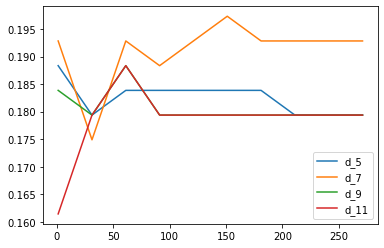

In [219]:
from sklearn.model_selection import train_test_split

features = ["Pclass", "Sex", "SibSp", "Parch", "Name", "Embarked"]
y = train_data["Survived"]
X = prepare_df(train_data[features])
X.describe()
train_x, eval_x, train_y, eval_y = train_test_split(X.fillna(X.mean()), y, random_state=24)

for d in range(5, 12, 2):
    forest_accuracy_estimators(X.fillna(X.mean()), y, train_x, eval_x, train_y, eval_y, d, max_est=300, est_step=30)
plt.legend()
plt.show()

In [170]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, max_iter=10000)
model.fit(train_x, train_y)
eval_msu(train_x, eval_x, train_y, eval_y, model)

(0.17937219730941703, 0.16766467065868262)

In [171]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(random_state=0, max_iter=1000), X.fillna(X.mean()), y, cv=5)

array([0.82122905, 0.81460674, 0.81460674, 0.79775281, 0.87078652])

In [172]:
cross_val_score(RandomForestClassifier(n_estimators=40, max_depth=6, random_state=10), X.fillna(X.mean()), y, cv=5)

array([0.82122905, 0.82022472, 0.8258427 , 0.7752809 , 0.85393258])

In [201]:
from sklearn.ensemble import RandomForestClassifier

test_data = pd.read_csv('../data/kaggle/input/titanic/test.csv')
X_test = prepare_df(test_data[features])
X_test = X_test.fillna(X.mean())

model = RandomForestClassifier(n_estimators=30, max_depth=7, random_state=1) #245/8
model.fit(train_x, train_y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('../data/kaggle/output/my_submission.csv', index=False)
print("Your submission was successfully saved!")

['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Dr']
Your submission was successfully saved!


<ipython-input-177-0756dd6cb8a1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = list(zip(df.Sex, df.Name, df.SibSp))
<ipython-input-177-0756dd6cb8a1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].transform(lambda n: extract_title(n))


['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']


<AxesSubplot:>

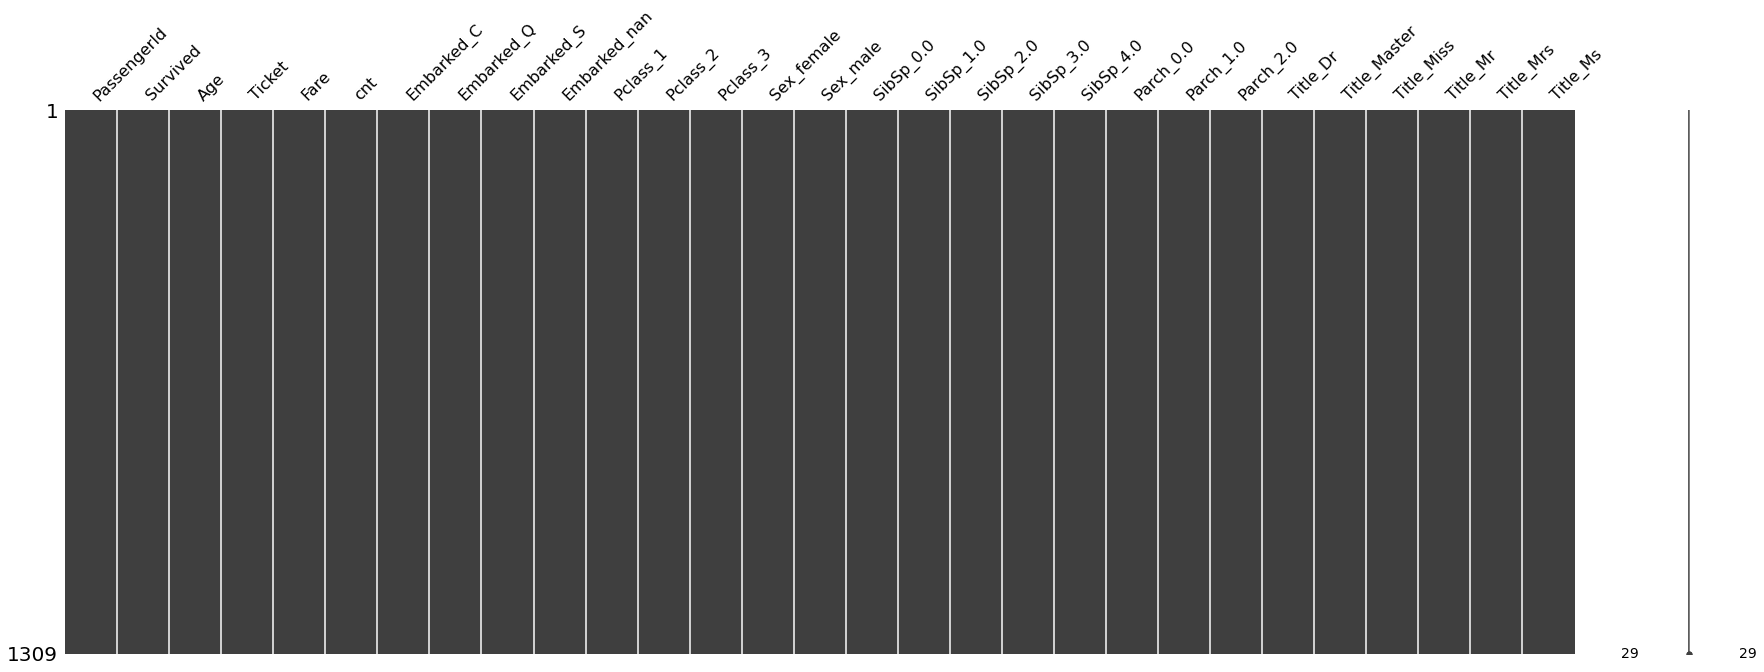

In [215]:
import pandas as pd
import missingno as msno

train_data = pd.read_csv('../data/kaggle/input/titanic/train.csv')
%matplotlib inline
msno.matrix(prepare_df(all_data).fillna(all_data.mean()).drop(columns=['Cabin']), figsize = (30,10))